`x = r * x * (1 - x)`  
`phi(x) = r * x * (1 - x)`  
`phi'(x) = r - 2rx`

для сходимости к корню необходимо, чтобы первое выбранное нами значение лежало в такой окрестности корня, что:  
`|phi'(x)| <= 1`  

Отсюда следует, что:  
`(r - 1) / (2 * r) < x < (r + 1) / (2 * r)`

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import math
import random

In [29]:
def phi(x, r):
    return r * x * (1 - x)

def get_window(r):
    return (r - 1) / (2 * r), (r + 1) / (2 * r)

def is_wave(x, x_0, x_1):
    return x_0 < x < x_1 or x_0 > x > x_1

In [132]:
def simple_iterations(epsilon, r, iter=1000, draw=False):
    (left_border, right_border) = get_window(r)
    iterations = 0
    
    cur_x = random.uniform(left_border, right_border)
    next_x = phi(cur_x, r)

    wave_cur = cur_x
    wave_next = next_x
    
    x = [next_x]
    wave = False
    
    while (abs(cur_x - next_x) > epsilon):
        cur_x = next_x
        next_x = phi(cur_x, r)
        x.append(next_x)
        iterations += 1
        if (iterations > iter):
            return (None, iter, wave)
        
    for i in range(1, len(x)):
        wave = is_wave(next_x, x[i - 1], x[i])
        if wave:
            break
        
    if draw:
        plt.plot([float(i) / 10 for i in range(1, len(x) + 1)], x, 'r.', ms=3)
        plt.show()
        
    return (next_x, iterations, wave)

In [133]:
def check_conv(left, right, iter, eps, check_eps, draw=False):
    roots = [[0, 0], [0, 0], [0, []]]
    for i in range(0, iter):
        cur_r = random.uniform(left, right)
        (answer, iters, wave) = simple_iterations(eps, cur_r, draw=draw)
        x1 = 0.0
        x2 = 1 - (1 / cur_r)
        if (answer is not None):
            if (abs(answer - x1) < abs(answer - x2) and abs(answer - x1) < check_eps):
                roots[0][wave] += 1
            elif (abs(answer - x2) < check_eps):
                roots[1][wave] += 1
            else:
                roots[2][0] += 1
                roots[2][1].append(cur_r)
        else:
            roots[2][0] += 1
            roots[2][1].append(cur_r)
    
    if not draw:
        print(f"{left} to {right} with eps = {eps} and iter = {iter}:\n")
        print("root 0.0, not wave =         " + str(roots[0][0]))
        print("root 0.0, wave =             " + str(roots[0][1]))
        print("root 1 - (1 / r), not wave = " + str(roots[1][0]))
        print("root 1 - (1 / r), wave =     " + str(roots[1][1]))
        print("not conv =                   " + str(roots[2][0]))
        print("not conv points =            " + str(roots[2][1]))

In [134]:
check_conv(0.01, 0.99, 10**4, 1e-8, 1e-6)

0.01 to 0.99 with eps = 1e-08 and iter = 10000:

root 0.0, not wave =         10000
root 0.0, wave =             0
root 1 - (1 / r), not wave = 0
root 1 - (1 / r), wave =     0
not conv =                   0
not conv points =            []


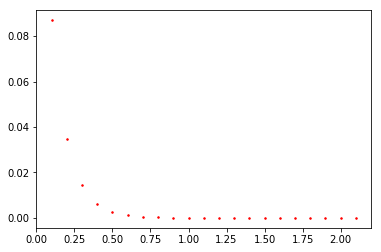

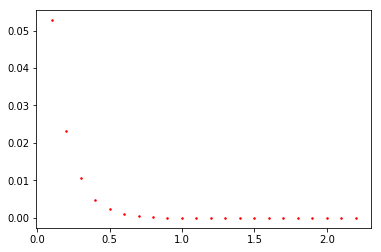

In [129]:
check_conv(0.01, 0.99, 2, 1e-8, 1e-6, draw=True)

Как видно из приведенных нами вычислений, при выборе `r` из промежутка (0, 1) данная нам функция `phi` сходится монотонно к корню <code>x<sub>0</sub> = 0</code>

In [135]:
check_conv(1.01, 2.99, 10**4, 1e-8, 1e-6)
print('\n' * 3)
check_conv(1.01, 1.99, 10**4, 1e-8, 1e-6)
print('\n' * 3)
check_conv(2.01, 2.99, 10**4, 1e-8, 1e-6)

1.01 to 2.99 with eps = 1e-08 and iter = 10000:

root 0.0, not wave =         0
root 0.0, wave =             0
root 1 - (1 / r), not wave = 5098
root 1 - (1 / r), wave =     4872
not conv =                   30
not conv points =            [2.9858038669655578, 2.988689492104717, 2.987032161988262, 2.9889769114316906, 2.984842810451674, 2.988109999205744, 2.985546500007847, 2.985134288337461, 2.989347870039911, 2.9864070727424803, 2.9895908534333895, 2.98996697403847, 2.9889086605972253, 2.987603358911911, 2.9848534335154273, 2.98670274574726, 2.986520256690107, 2.987471538222497, 2.9898378514452006, 2.989719814761925, 2.9861084744984407, 2.9887080621797004, 2.987268533044896, 2.984467117990767, 2.988331238131094, 2.9877642520824494, 2.9847280878253715, 2.9849018199709456, 2.9886294576590284, 2.988028072998878]




1.01 to 1.99 with eps = 1e-08 and iter = 10000:

root 0.0, not wave =         0
root 0.0, wave =             0
root 1 - (1 / r), not wave = 10000
root 1 - (1 / r), wave =    

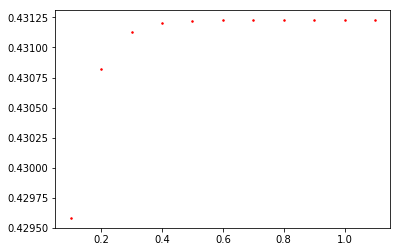

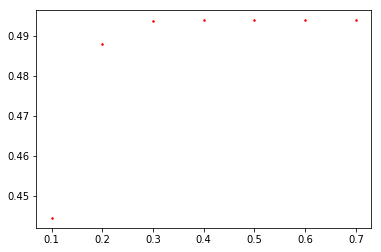

In [131]:
check_conv(1.01, 1.99, 2, 1e-8, 1e-6, draw=True)

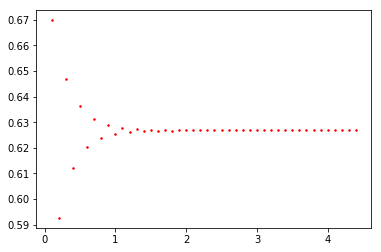

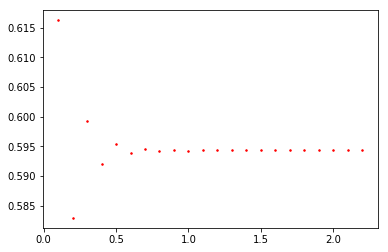

In [118]:
check_conv(2.01, 2.99, 2, 1e-8, 1e-6, draw=True)

Как видно из приведенных нами вычислений, при выборе `r` из промежутка (1, 3) данная нам функция `phi` сходится к корню <code>x<sub>1</sub> = 1 - (1 / r)</code>

При этом если выбирать `r` из промежутка (1, 2), то функция `phi` сходится к корню <code>x<sub>1</sub></code> монотонно, а при выборе `r` из промежутка (2, 3) — колебательно

In [136]:
def show_graphic(r, rang, eps):
    xVals = []
    yVals = []
    
    for j in range(rang):
        (lBorder, rBorder) = get_window(r)
        x = random.uniform(lBorder, rBorder)
        for i in range(500):
            x = phi(x, r)
            xVals.append(x)
            yVals.append(r)
        r += eps
    
    plt.plot(yVals, xVals, 'b+', ms=0.1)
    plt.show()

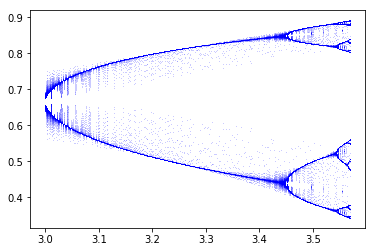

In [137]:
def show_bifurcation():
    show_graphic(3.0, 570, 0.001)

show_bifurcation()

В теории график должен распасться в диапазонах 3-3.35..., 3.35...-3.52..., 3.52...-3.56... и т.д. Мы можем заметить, что на нашем графике это выполняется. Мы получили каскад бифуркаций удвоения периода.

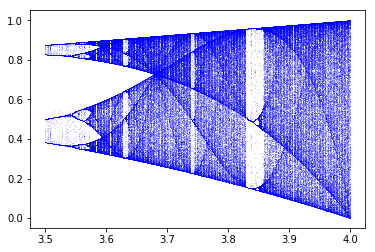

In [138]:
def show_chaos():
    show_graphic(3.50, 500, 0.001)
    
show_chaos()

По теории, между числами R(inf) и 4, поведение последовательности должно представлять из себя детерменированный хаос. График ведет себя в соответствии с теорией. На нем присутствуют зоны таких R, при которых наблюдаются сгущения и разрежения итерационной последовательности. По теории в окрестности R = 4 должен наблюдаться белый шум. Наш график подходит под теорию и в этом случае.